In [2]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
all_data_df = pd.read_csv('normalized_by_2000_dtpts.csv')

In [4]:
all_data_df.columns

Index(['Unnamed: 0', 'DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Cloud Type', 'Dew Point', 'Solar Zenith Angle',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar',
       'Normalized_Solar_lin', 'Normalized_Solar_geom', 'Normalized_Solar',
       'normalized_solar'],
      dtype='object')

In [5]:
all_data_df.head()

,Unnamed: 0,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,...,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar,normalized_solar
0,0,13,0,13,50,204,77,4,10.0,82.67,...,3.814,355.2,96.35,11.0,1010.0,0.000080,9.756098e-07,9.756098e-07,6.611570e-07,0.000004
1,1,65,0,65,81,356,160,8,10.0,77.27,...,3.741,355.2,96.38,11.0,1010.0,0.184486,2.249829e-03,2.249829e-03,1.524678e-03,0.010323
2,2,10,0,10,99,487,248,7,10.0,72.18,...,3.669,1.7,96.05,11.0,1010.0,0.472936,5.767512e-03,5.767512e-03,3.908562e-03,0.026463
3,3,14,0,14,114,566,331,8,10.0,67.46,...,3.601,1.7,96.08,11.0,1010.0,0.919004,1.120737e-02,1.120737e-02,7.595074e-03,0.051423
4,4,31,0,31,119,643,409,4,10.0,63.22,...,3.534,5.4,89.10,12.0,1010.0,1.363654,1.662993e-02,1.662993e-02,1.126987e-02,0.076303


In [6]:
for label in ['Unnamed: 0', 'Date', 'hhmm','Installed', 'Fill Flag']:
    if label in all_data_df.columns:
        all_data_df.drop(label,axis=1,inplace=True)

TRAIN: [ 5147  5148  5149 ... 51466 51467 51468] TEST: [   0    1    2 ... 5144 5145 5146]
Set 1
R-squared of training data is: 0.754, 0.754
R-squared of testing data is: 0.469, 0.469
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [ 5147  5148  5149 ... 10291 10292 10293]
Set 2
R-squared of training data is: 0.743, 0.743
R-squared of testing data is: 0.594, 0.594
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [10294 10295 10296 ... 15438 15439 15440]
Set 3
R-squared of training data is: 0.751, 0.751
R-squared of testing data is: 0.576, 0.576
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [15441 15442 15443 ... 20585 20586 20587]
Set 4
R-squared of training data is: 0.745, 0.745
R-squared of testing data is: 0.566, 0.566
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [20588 20589 20590 ... 25732 25733 25734]
Set 5
R-squared of training data is: 0.746, 0.746
R-squared of testing data is: 0.662, 0.662
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [

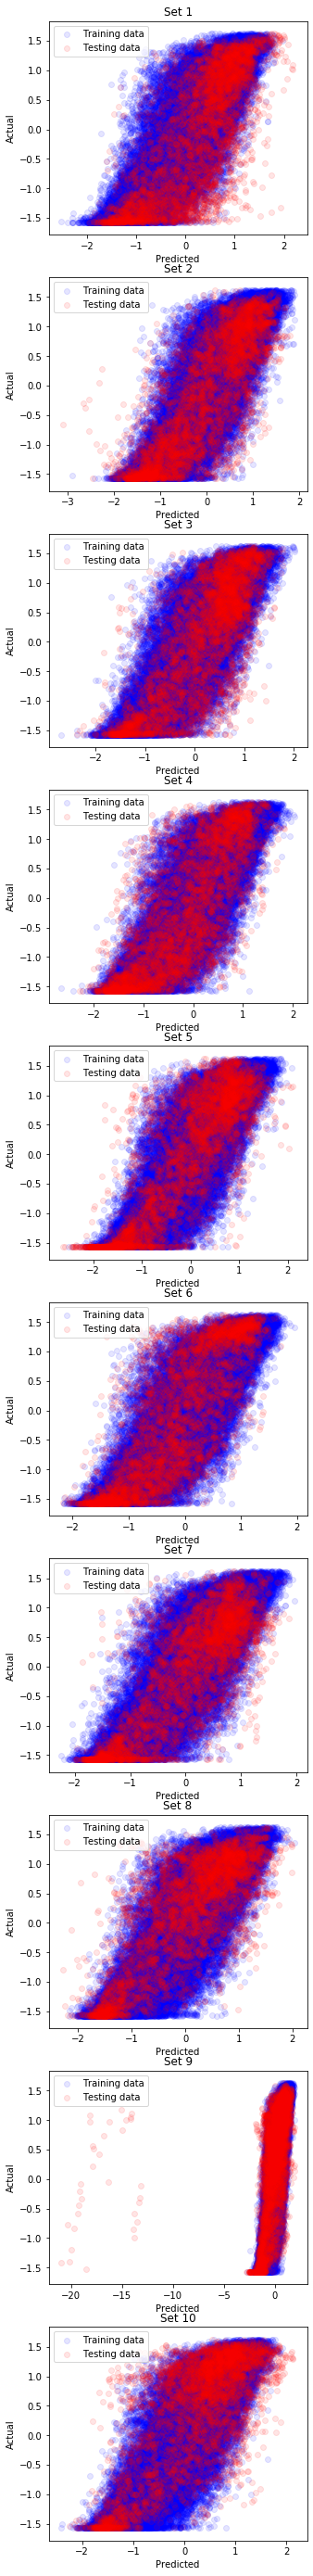

In [9]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
feature_list = ranked_list[:11]
prediction = ['normalized_solar']
scaler = preprocessing.StandardScaler()

#scaling data:
X_pn = all_data_df[feature_list]
y_pn = all_data_df[prediction]
X_normalized = scaler.fit_transform(X_pn)
y_normalized = scaler.fit_transform(y_pn)

kf = KFold(n_splits=10,random_state=1)# Define the split - into 100 folds 

fig, axs = plt.subplots(10, 1, figsize=(5,50))

i=0

for train_index, test_index in kf.split(X_normalized, y_normalized):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, y_train = X_normalized[train_index], y_normalized[train_index].reshape(-1)
    X_test, y_test = X_normalized[test_index], y_normalized[test_index].reshape(-1)
    clf = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(100,100),max_iter=300)
    clf.fit(X_train,y_train)
    print('Set '+str(i+1))
    print('R-squared of training data is: '+"{:.3f}".format(r2_score(y_train,clf.predict(X_train)))+', '+"{:.3f}".format(clf.score(X_train,y_train)))
    print('R-squared of testing data is: '+"{:.3f}".format(r2_score(y_test,clf.predict(X_test)))+', '+"{:.3f}".format(clf.score(X_test,y_test)))
    axs[i].scatter(clf.predict(X_train), y_train, alpha = 0.1, color='blue')
    axs[i].scatter(clf.predict(X_test), y_test, alpha = 0.1, color='red')
    axs[i].set_title('Set '+str(i+1), fontsize=12)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].legend(('Training data', 'Testing data'))
    i=i+1

TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   10    28    44 ... 51437 51442 51444]
Set 1
R-squared of training data is: 0.733, 0.733
R-squared of testing data is: 0.690, 0.690
TRAIN: [    0     1     3 ... 51466 51467 51468] TEST: [    2    12    23 ... 51416 51417 51435]
Set 2
R-squared of training data is: 0.744, 0.744
R-squared of testing data is: 0.712, 0.712
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    3     8    11 ... 51436 51449 51465]
Set 3
R-squared of training data is: 0.740, 0.740
R-squared of testing data is: 0.715, 0.715
TRAIN: [    0     1     2 ... 51465 51467 51468] TEST: [   19    21    22 ... 51462 51463 51466]
Set 4
R-squared of training data is: 0.743, 0.743
R-squared of testing data is: 0.697, 0.697
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   26    35    36 ... 51403 51405 51424]
Set 5
R-squared of training data is: 0.745, 0.745
R-squared of testing data is: 0.717, 0.717
TRAIN: [    1     2     3 ... 51466 51467 51468] T

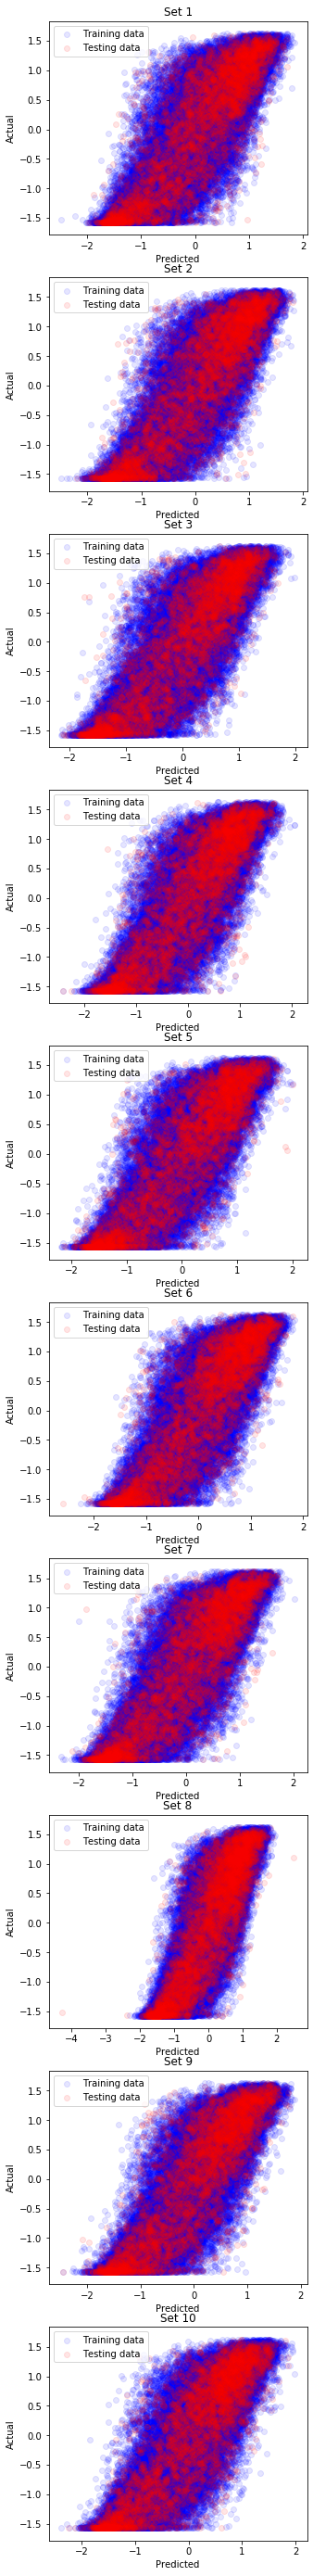

In [10]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
feature_list = ranked_list[:11]
prediction = ['normalized_solar']
scaler = preprocessing.StandardScaler()

#scaling data:
X_pn = all_data_df[feature_list]
y_pn = all_data_df[prediction]
X_normalized = scaler.fit_transform(X_pn)
y_normalized = scaler.fit_transform(y_pn)

kf = KFold(n_splits=10,random_state=1,shuffle=True)# Define the split - into 100 folds 

fig, axs = plt.subplots(10, 1, figsize=(5,50))

i=0

for train_index, test_index in kf.split(X_normalized, y_normalized):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, y_train = X_normalized[train_index], y_normalized[train_index].reshape(-1)
    X_test, y_test = X_normalized[test_index], y_normalized[test_index].reshape(-1)
    clf = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(100,100),max_iter=300)
    clf.fit(X_train,y_train)
    print('Set '+str(i+1))
    print('R-squared of training data is: '+"{:.3f}".format(r2_score(y_train,clf.predict(X_train)))+', '+"{:.3f}".format(clf.score(X_train,y_train)))
    print('R-squared of testing data is: '+"{:.3f}".format(r2_score(y_test,clf.predict(X_test)))+', '+"{:.3f}".format(clf.score(X_test,y_test)))
    axs[i].scatter(clf.predict(X_train), y_train, alpha = 0.1, color='blue')
    axs[i].scatter(clf.predict(X_test), y_test, alpha = 0.1, color='red')
    axs[i].set_title('Set '+str(i+1), fontsize=12)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].legend(('Training data', 'Testing data'))
    i=i+1

With top 11 features, R-squared of testing data is: 0.667
R-squared of training data is: 0.715
0.6673869165695121
0.7154006874011678


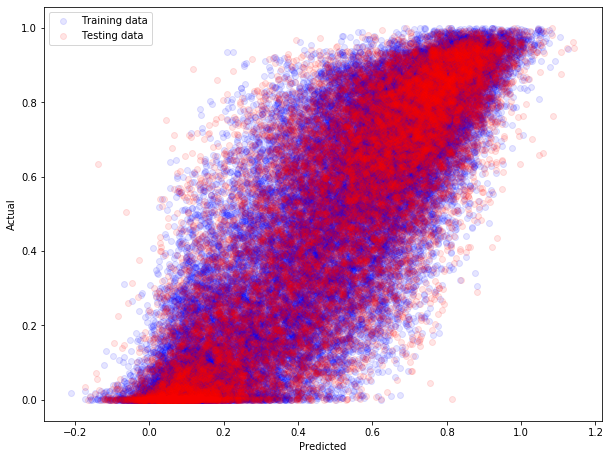

In [11]:
# fit without surface albedo and solar zenith angle
ranked_list = ['Relative Humidity', 'GHI', 'Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(all_data_df,test_size=0.3,random_state=100)
prediction = 'normalized_solar'

feature_list = ranked_list

scaler = preprocessing.StandardScaler()

X_train = np.array(train[feature_list])
y_train = np.array(train[prediction])
X_test = np.array(test[feature_list])
y_test = np.array(test[prediction])
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)
clf = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(100,100),max_iter=300)
clf.fit(X_train_standardized,y_train)

fig, axs = plt.subplots(1, 1, figsize=(10,10))

axs.scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
axs.scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
axs.set_xlabel('Predicted')
axs.set_ylabel('Actual')
axs.legend(('Training data', 'Testing data'))
print('With top '+str(11)+' features, R-squared of testing data is: '+"{:.3f}".format(r2_score(y_test,clf.predict(X_test_standardized))))
print('R-squared of training data is: '+"{:.3f}".format(r2_score(y_train,clf.predict(X_train_standardized))))
plt.axis('scaled')
print(clf.score(X_test_standardized,y_test))
print(clf.score(X_train_standardized,y_train))

With top 11 features, R-squared of testing data is: 0.694
R-squared of training data is: 0.736


(-0.30241038667670095,
 1.199000879540322,
 -0.05675140657767147,
 1.0567514093797523)

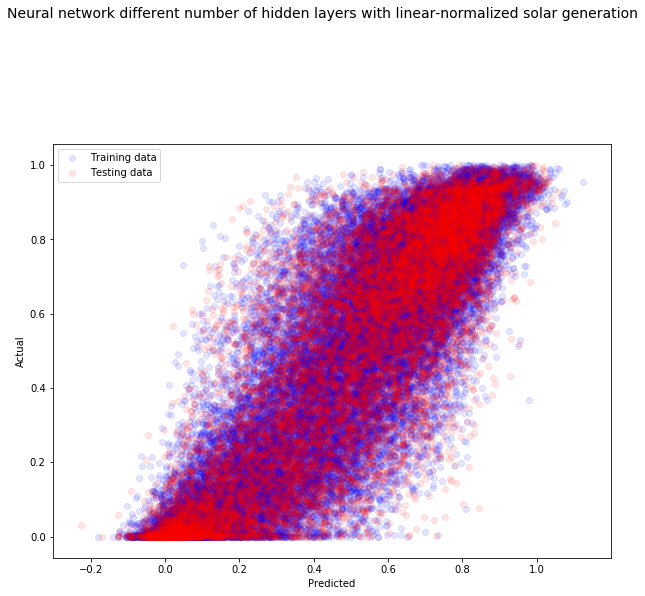

In [12]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(all_data_df,test_size=0.3,random_state=100)
prediction = 'normalized_solar'

feature_list = ranked_list[:11]

scaler = preprocessing.StandardScaler()

X_train = np.array(train[feature_list])
y_train = np.array(train[prediction])
X_test = np.array(test[feature_list])
y_test = np.array(test[prediction])
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)
clf = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(50,50,50),max_iter=300)
clf.fit(X_train_standardized,y_train)

fig, axs = plt.subplots(1, 1, figsize=(10,10))

fig.suptitle('Neural network different number of hidden layers with linear-normalized solar generation', fontsize=14)

axs.scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
axs.scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
axs.set_xlabel('Predicted')
axs.set_ylabel('Actual')
axs.legend(('Training data', 'Testing data'))
print('With top '+str(11)+' features, R-squared of testing data is: '+"{:.3f}".format(r2_score(y_test,clf.predict(X_test_standardized))))
print('R-squared of training data is: '+"{:.3f}".format(r2_score(y_train,clf.predict(X_train_standardized))))
plt.axis('scaled')


With top 11 features, R-squared of testing data is: 0.677
R-squared of training data is: 0.697


(-0.29866187526153243,
 1.137215705205311,
 -0.05675140657767147,
 1.0567514093797523)

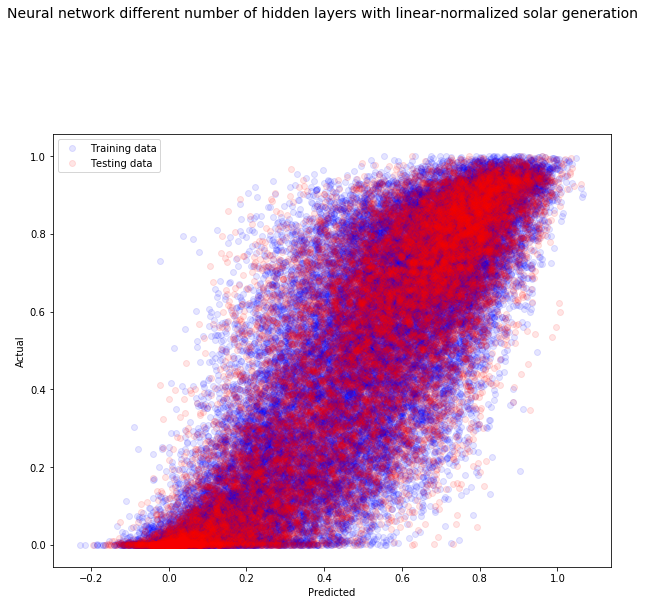

In [13]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(all_data_df,test_size=0.3,random_state=100)
prediction = 'normalized_solar'

feature_list = ranked_list[:11]

scaler = preprocessing.StandardScaler()

X_train = np.array(train[feature_list])
y_train = np.array(train[prediction])
X_test = np.array(test[feature_list])
y_test = np.array(test[prediction])
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)
clf = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(100,),max_iter=300)
clf.fit(X_train_standardized,y_train)

fig, axs = plt.subplots(1, 1, figsize=(10,10))

fig.suptitle('Neural network different number of hidden layers with linear-normalized solar generation', fontsize=14)

axs.scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
axs.scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
axs.set_xlabel('Predicted')
axs.set_ylabel('Actual')
axs.legend(('Training data', 'Testing data'))
print('With top '+str(11)+' features, R-squared of testing data is: '+"{:.3f}".format(r2_score(y_test,clf.predict(X_test_standardized))))
print('R-squared of training data is: '+"{:.3f}".format(r2_score(y_train,clf.predict(X_train_standardized))))
plt.axis('scaled')


In [14]:
all_data_df[feature_list].describe()

,Relative Humidity,Solar Zenith Angle,GHI,Surface Albedo,Wind Direction,Temperature,Wind Speed,DNI,DHI,Dew Point,Pressure
count,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000
mean,70.439983,57.715805,375.057394,0.150611,167.285972,23.629979,2.175863,362.723367,142.666207,16.857473,1010.325050
std,18.528721,25.699414,302.558076,0.020752,91.268884,7.431762,1.078076,343.449828,119.960168,7.353329,5.936796
min,18.500000,6.490000,0.000000,0.131000,0.000000,-3.000000,0.000000,0.000000,0.000000,-11.600000,990.000000
25%,56.420000,39.130000,92.000000,0.141000,117.200000,19.000000,1.400000,5.000000,59.000000,12.800000,1010.000000
50%,71.420000,55.760000,332.000000,0.150000,160.000000,25.000000,2.000000,281.000000,116.000000,19.000000,1010.000000
75%,85.440000,75.100000,627.000000,0.160000,203.200000,29.000000,2.800000,714.000000,199.000000,23.000000,1010.000000
max,100.000000,169.450000,1066.000000,0.870000,360.000000,41.000000,7.000000,1023.000000,507.000000,27.100000,1039.000000
